In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
raw_data = pd.read_csv('Country.csv')

raw_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Q1. Check for missing values , duplicate values and correlation ? And resolve them accordingly

### Missing Values

In [4]:
raw_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**There are no missing values in dataset**

### Duplicate Values

In [5]:
# Check if there is replication in the data
raw_data.duplicated().any()

False

**No duplicate entries**

### Correlation

In [6]:
data_num=raw_data.drop(["country"], axis=1)
corr = data_num.corr()
corr

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


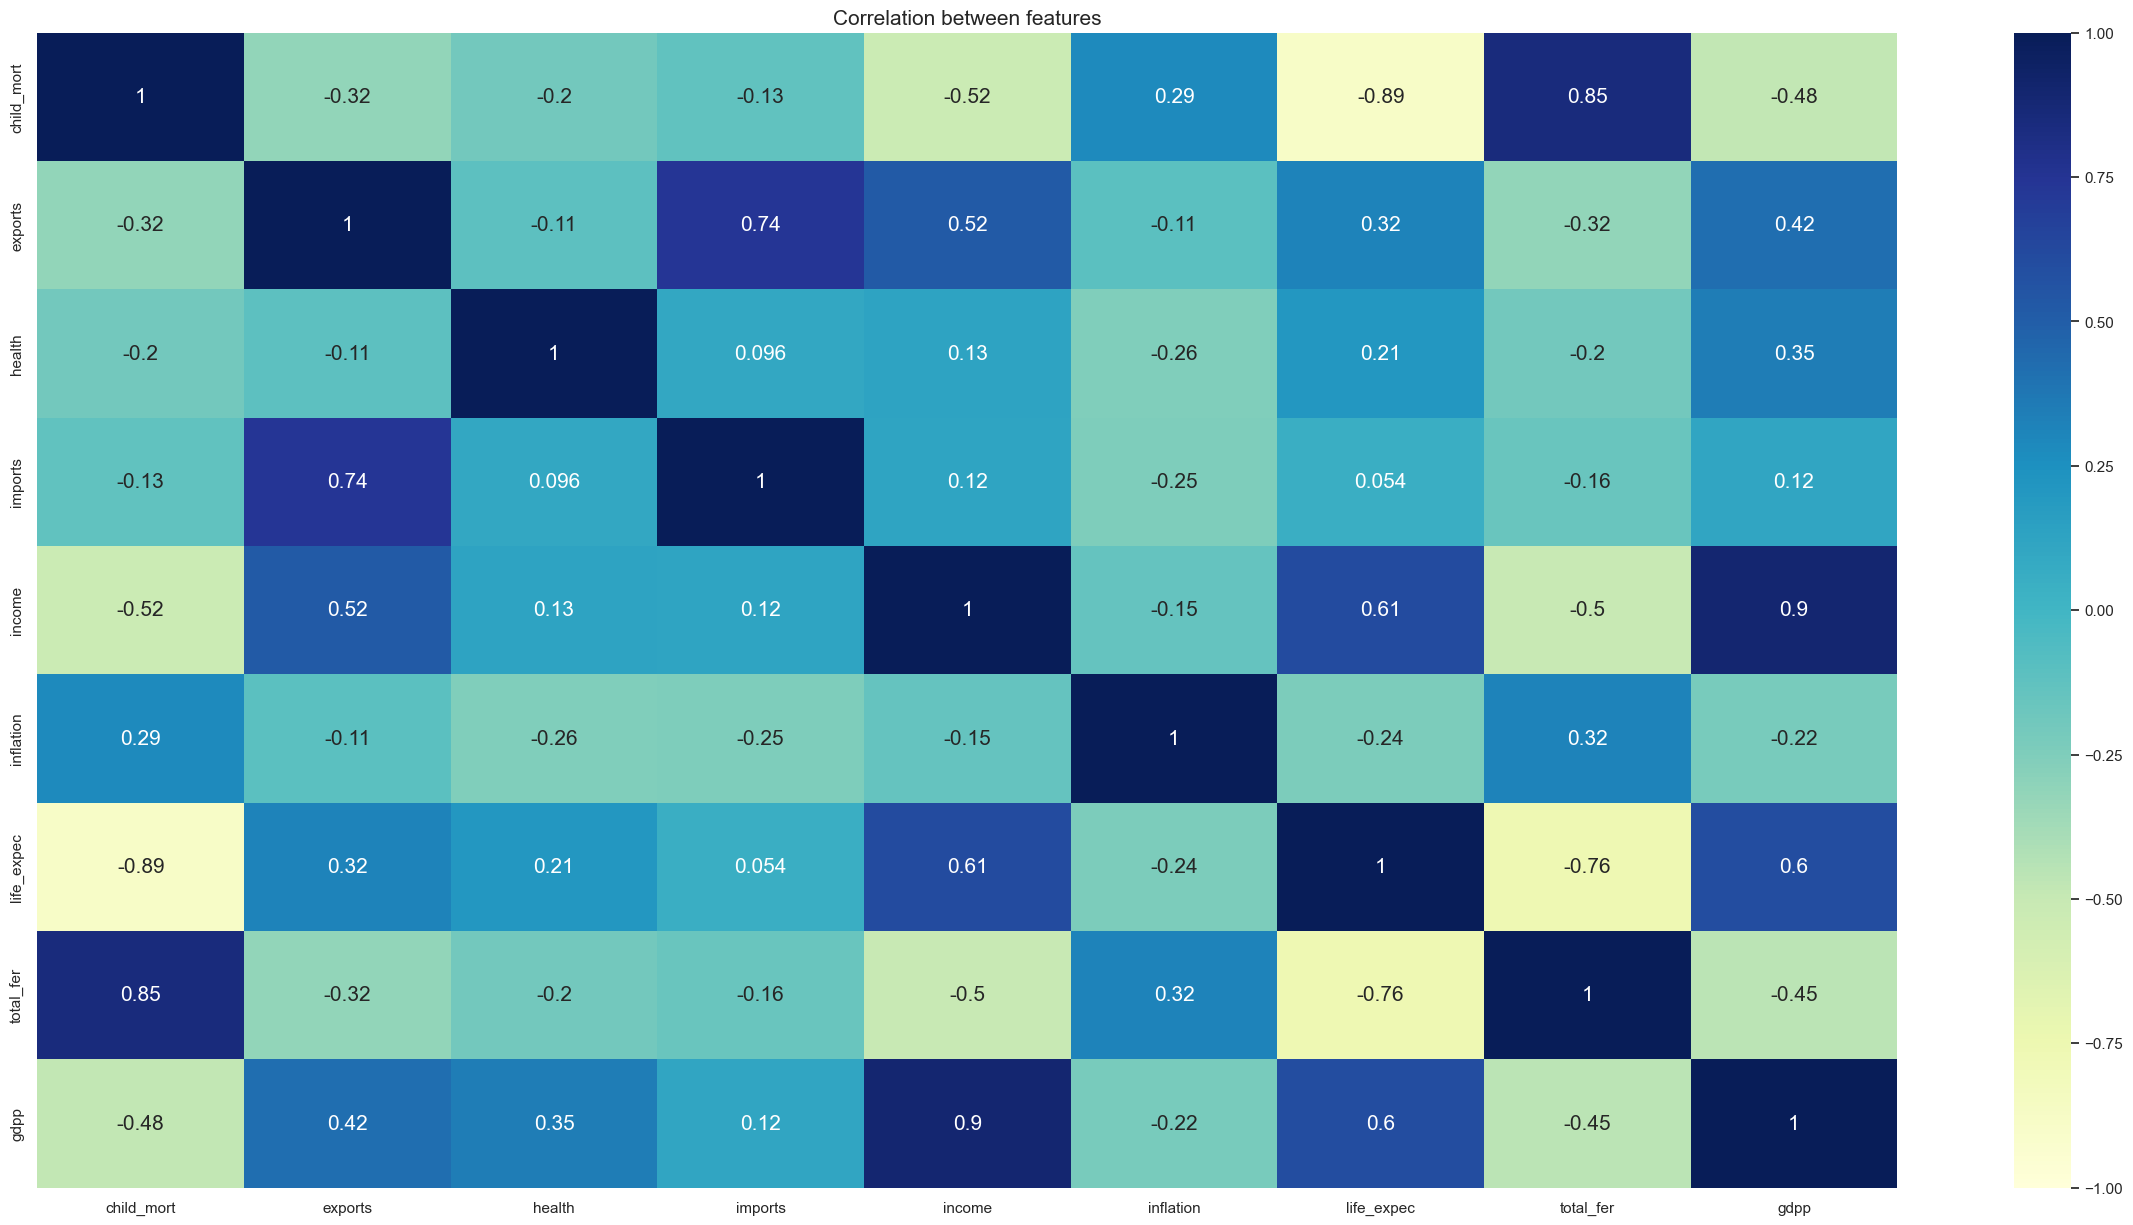

In [7]:

# set the figure size
plt.figure(figsize=(30, 15))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# set condition to get a strong correlation between the variables
sns.heatmap(corr, 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

# set the title
# fontsize=30: set the font size of the title
plt.title('Correlation between features', fontsize=15)
# display the plot
plt.show()

**From the correlation map we see that**

1. child_mort has a strong inverse correlation with income(net income per person), life_expect(expected years of living) and gdpp(the GDP per capita), a moderate correlation with inflation(annual growth rate of the total GDP) and total_fert(fertility rate).
2. income is correlated with exports and gdpp.
3. exports is correlated with imports
4. life_expec is correlated with income and gdpp, inversly correlated with total_fert

The variables can be didived into economic metrics(exports, imports, income, inflation, gdpp, health), health metrics(child_mort, life_expec, total_fer).

### Q2. Which countries should be provided with the aid ?

The variables can be didived into economic metrics(exports, imports, income, inflation, gdpp, health), health metrics(child_mort, life_expec, total_fer).

In [8]:
# separate country column and the rest variables
raw_data.index=raw_data.iloc[:,0]

In [9]:
data_1 = raw_data.copy().drop('country',axis=1)

In [10]:
from sklearn.cluster import KMeans

In [11]:
# clustering the samples based on health factors(child_mort, life_expec, total_fer)
data_clustering_1=raw_data[['child_mort', 'health','life_expec', 'total_fer']]

# plot sum of squared distances (elbow method)
K = range(1,10)
data_km = [KMeans(n_clusters=k).fit(data_clustering_1) for k in K]
ssd = [data_km[k].inertia_ for k in range(len(data_km))]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, ssd, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow for KMeans clustering')
plt.show()

**Considering k = 3**

In [12]:
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(data_clustering_1)
pred = model.labels_
data_1['cluster_km'] = pred
data_1.head()

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_km
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


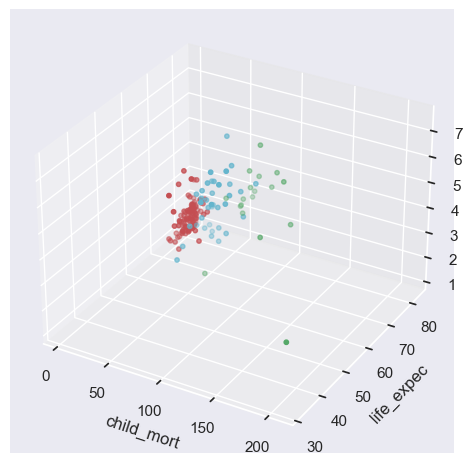

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
cluster_0 = data_1.query('cluster_km==0')
cluster_1 = data_1.query('cluster_km==1')
cluster_2 = data_1.query('cluster_km==2')
plt_0 = ax.scatter(cluster_0['child_mort'], cluster_0['life_expec'], cluster_0['total_fer'], c='c', s=10)
plt_1 = ax.scatter(cluster_1['child_mort'], cluster_1['life_expec'], cluster_1['total_fer'], c='r', s=10)
plt_2 = ax.scatter(cluster_2['child_mort'], cluster_2['life_expec'], cluster_2['total_fer'], c='g', s=10)
ax.set_xlabel('child_mort')
ax.set_ylabel('life_expec')
ax.set_zlabel('total_fer')
plt.tight_layout()
plt.show()

We can see from the plot that cluster 2 are high child_mort, high total_fer and low life_expec, indicating poor social health, so we want to further cluster these data points based on their economic conditions.

                          income   gdpp  inflation
country                                           
Angola                      5900   3530     22.400
Benin                       1820    758      0.885
Burkina Faso                1430    575      6.810
Cameroon                    2660   1310      1.910
Central African Republic     888    446      2.010
Chad                        1930    897      6.390
Congo, Dem. Rep.             609    334     20.800
Cote d'Ivoire               2690   1220      5.390
Equatorial Guinea          33700  17100     24.900
Guinea                      1190    648     16.100
Guinea-Bissau               1390    547      2.970
Haiti                       1500    662      5.450
Lesotho                     2380   1170      4.150
Mali                        1870    708      4.370
Mozambique                   918    419      7.640
Niger                        814    348      2.550
Nigeria                     5150   2330    104.000
Sierra Leone                122

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/

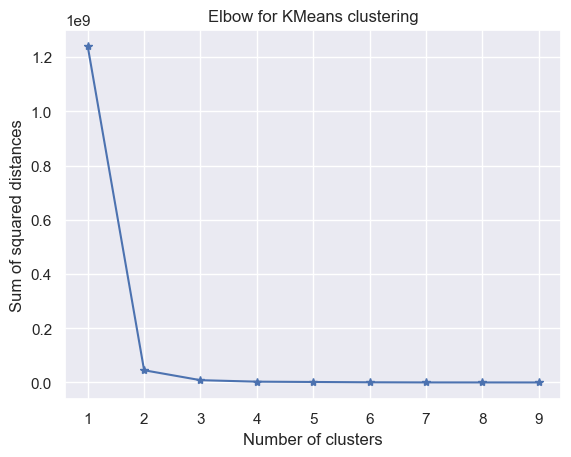

In [24]:
# clustering the samples based on economic factors(child_mort, life_expec, total_fer)
data_clustering_2=cluster_2[['income', 'gdpp', 'inflation']]
print(data_clustering_2)
# plot sum of squared distances (elbow method)
K = range(1,10)
data_km = [KMeans(n_clusters=k).fit(data_clustering_2) for k in K]
ssd = [data_km[k].inertia_ for k in range(len(data_km))]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, ssd, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow for KMeans clustering')
plt.show()


In [15]:
kmeans = KMeans(n_clusters=2)
model = kmeans.fit(data_clustering_2)

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
pred = model.labels_
cluster_2['cluster_km'] = pred
cluster_2.head()

/var/folders/t_/j1kf85f16f7cqq6lm4lhjr440000gn/T/ipykernel_21828/4150090895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2['cluster_km'] = pred


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_km
country,,,,,,,,,,
Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,0
Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,0
Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,0
Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446,0


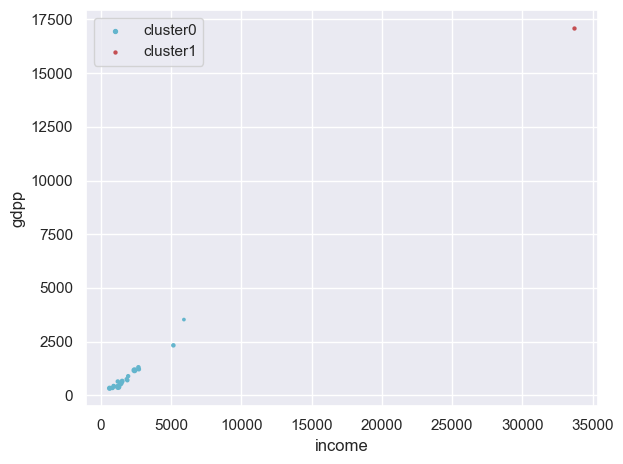

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
cluster_2_0 = cluster_2.query('cluster_km==0')
cluster_2_1 = cluster_2.query('cluster_km==1')
cluster_2_2 = cluster_2.query('cluster_km==2')
plt_0 = ax.scatter(cluster_2_0['income'], cluster_2_0['gdpp'], cluster_2_0['health'], c='c',  label='cluster0')
plt_1 = ax.scatter(cluster_2_1['income'], cluster_2_1['gdpp'], cluster_2_1['health'], c='r', label='cluster1')
ax.set_xlabel('income')
ax.set_ylabel('gdpp')
#ax.set_zlabel('health')
ax.legend()
plt.tight_layout()
plt.show()

From the plot we see that cluster 0 of the second k-means contains countries with low income and low gdpp. The inflation expenses vary.

In [18]:
# sort cluster0 by gdpp, income, health ascendingly
cluster_2_0.sort_values(['income','gdpp','inflation'],ascending=True)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_km
country,,,,,,,,,,
"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,0
Niger,123.0,22.2,5.16,49.1,814,2.550,58.8,7.49,348,0
Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446,0
Mozambique,101.0,31.5,5.21,46.2,918,7.640,54.5,5.56,419,0
Guinea,109.0,30.3,4.93,43.2,1190,16.100,58.0,5.34,648,0
Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399,0
Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.970,55.6,5.05,547,0
Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,0
Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662,0


**Ans : Results suggest that the aid should be provided to the countries at the top of the list(Congo, Niger, Central African Republic, etc.).**

### Q3. Build a Kmeans model by selecting optimal number of clusters using elbow method ?

In [19]:
df_Kmeans = raw_data.copy()


/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/

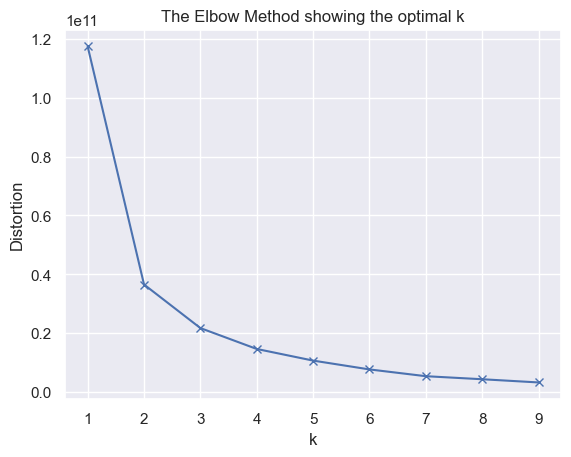

In [20]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_num)
    #distortions.append(sum(np.min(cdist(PrincipalComponents, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / PrincipalComponents.shape[0])
    distortions.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

By using Elbow method we found k = 3 as optimal number of clusters

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


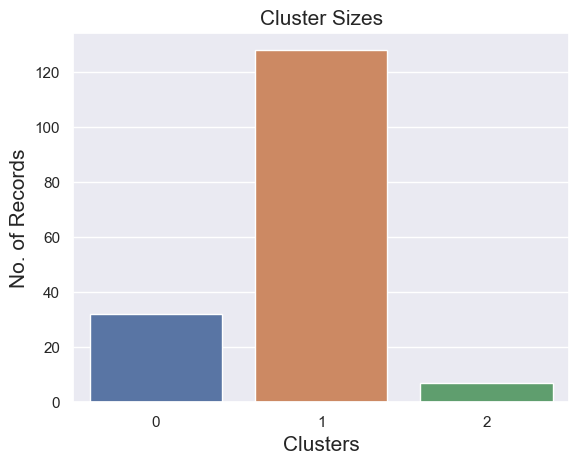

In [21]:

Kmodel = KMeans(n_clusters= 3, random_state= 10)

Kmodel.fit(data_num)
KMeans(n_clusters=3, random_state=10)
df_Kmeans['Cluster'] = Kmodel.fit_predict(data_num)
sns.countplot(data= df_Kmeans, x = 'Cluster')


plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Records', fontsize = 15)

plt.show()

### Q4. Find optimal number of clusters using silhouette test ?

In [22]:
from sklearn.metrics import silhouette_score
# create a list for different values of K
n_clusters = [2,3,4, 5,6,7,8]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters :
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(data_num)
    
    score = silhouette_score(data_num, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2, silhouette score is 0.7256314906273207)
For n_clusters = 3, silhouette score is 0.7003508054481694)
For n_clusters = 4, silhouette score is 0.6109297437247547)


/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5, silhouette score is 0.572715818235237)
For n_clusters = 6, silhouette score is 0.589653373502461)
For n_clusters = 7, silhouette score is 0.5944253756384579)
For n_clusters = 8, silhouette score is 0.5964827694227414)


/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**The silhouette score is high when number of clusters are 2**

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


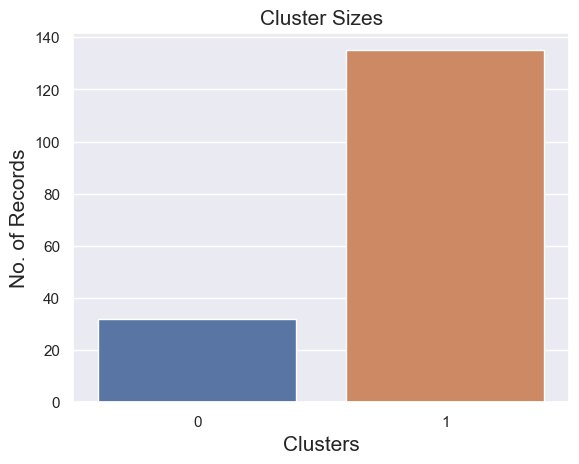

In [23]:
Kmodel = KMeans(n_clusters= 2, random_state= 10)

Kmodel.fit(data_num)
KMeans(n_clusters=2, random_state=10)
df_Kmeans['Cluster'] = Kmodel.fit_predict(data_num)
sns.countplot(data= df_Kmeans, x = 'Cluster')


plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Records', fontsize = 15)

plt.show()